In [1]:
import os
import numpy as np
import pandas as pd 
import math
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import find_peaks

In [2]:
plt.rcParams.update({
    "image.origin": "lower",
    "image.aspect": 1,
    "text.usetex": True,
    "grid.alpha": .5,
})
plt.style.use('ggplot')

# Método de Euler, Euler-Cromer e Runge-Kutta

## Questão 1) Pêndulo Simples
Para um pendulo simples, isto é uma massa pontual presa por um fio ideal submetida apenas à força da gravidade, realizando pequenas oscilações, tem seu comportamento dado pela segunda lei de Newton da forma de uma equação diferencial descrita por:
$$\frac{d^2\theta}{dt^2}+\frac{g}{l}\theta = 0$$

1)Pelo método de Euler teremos duas funções da forma:

$$ \omega_{i+\Delta t}=\omega_i-\frac{g}{l}\theta_i\Delta t $$ e $$\theta_{i+\Delta t}= \theta_i+\omega_i\Delta t$$

2)Pelo método de Euler-Cromer:

$$ \omega_{i+\Delta t}=\omega_i-\frac{g}{l}\theta_i\Delta t $$ e $$\theta_{i+\Delta t}= \theta_i+\omega_{i+\Delta t}\Delta t$$

3_Pelo método de Runge-Kutta:

$$ \omega_{meio}=\omega_i-\frac{g}{l}\theta_i\frac{\Delta t}{2} $$ e $$\theta_{meio}= \theta_i+\omega_{i}\frac{\Delta t}{2}$$

para serem usados em:

$$ \omega_{i+\Delta t}=\omega_i-\frac{g}{l}\theta_{meio}\Delta t $$ e $$\theta_{i+\Delta t}= \theta_i+\omega_{meio}\Delta t$$


In [3]:
def omega(dt,thetai,omegai, g, l):
    return omegai-(g/l)*thetai*dt
def theta(dt,thetai,omegai):
    return thetai+omegai*dt   

In [4]:
def edo2euler(fi,dfi, params_df,f0,df0,t0,dt,N):
    """
    Função para encontrar a solução numérica para uma EDO de 2 grau pelo metodo de Euler
    
    Params:
    fi = funcao de ordem 0 para cada passo i da fomrma fi=f(t,fi,dfi)
    dfi= derivada da função f para cada passo i da fomrma dfi=df(t,fi,dfi,params)
    f0= inicialização de f0
    t0= inicio
    dt= passo
    N = Numero de passos 
    
    Retorna: um par de listas com as soluções de f e df
    """
    f=np.zeros(int(N))
    df=np.zeros(int(N))

    f[0]=fi(t0,f0,df0)
    df[0]=dfi(t0,f0,df0,*params_df)
    
    for i in range(1,int(N)):
        f[i]=fi(dt,f[i-1],df[i-1])
        df[i]=dfi(dt,f[i-1],df[i-1],*params_df)
        #t0+=i*dt
    return (f,df)

def edo2eulcrom(fi,dfi, params_df,f0,df0,t0,dt,N):
    """
    Função para encontrar a solução numérica para uma EDO de 2 grau pelo método de Euler-Cromer
    Retorna: um par de listas com as soluções de f e df
    """
    f=np.zeros(int(N))
    df=np.zeros(int(N))
    
    df[0]=dfi(t0,f0,df0,*params_df)
    f[0]=fi(t0,f0,df[0])

    for i in range(1,int(N)):
        
        df[i]=dfi(dt,f[i-1],df[i-1],*params_df)
        f[i]=fi(dt,f[i-1],df[i])
        #t0+=i*dt
    return (f,df)

def edo2rungektt(fi,dfi, params_df,f0,df0,t0,dt,N):
    """
    Função para encontrar a solução numérica para uma EDO de 2 grau pelo método de Runge-Kutta
    Retorna: um par de listas com as soluções de f e df
    """
    f=np.zeros(int(N))
    df=np.zeros(int(N))

    f[0]=fi(t0,f0,df0)
    df[0]=dfi(t0,f0,df0,*params_df)
    
    for i in range(1,int(N)):
        fmeio=fi(dt/2,f[i-1],df[i-1])
        dfmeio=dfi(dt/2,f[i-1],df[i-1],*params_df)
        
        f[i]=fi(dt,f[i-1],dfmeio)
        df[i]=dfi(dt,fmeio,df[i-1],*params_df)
        #t0+=i*dt
    return (f,df)

O período $T$ de um pêndulo simples é dado pela expressão:
$$T=2\pi \sqrt{\frac{l}{g}}$$

Onde $l$ é o tamanho do fio e $g$ a gravidade. Para o problema em questão temos um fio de $l=9.8\,m$ e consideramos $g=9.8\,m/s^2$.

In [5]:
print("O período é portanto: {:.2f} segundos.".format(2*np.pi*np.sqrt(9.8/9.8)))

O período é portanto: 6.28 segundos.


In [6]:
euler = edo2euler(theta,omega,[9.8,9.8],0.15,0,0,0.04,31.42/0.04)
eulercrom = edo2eulcrom(theta,omega,[9.8,9.8],0.15,0,0,0.04,31.42/0.04)
rungektt = edo2rungektt(theta,omega,[9.8,9.8],0.15,0,0,0.04,31.42/0.04)

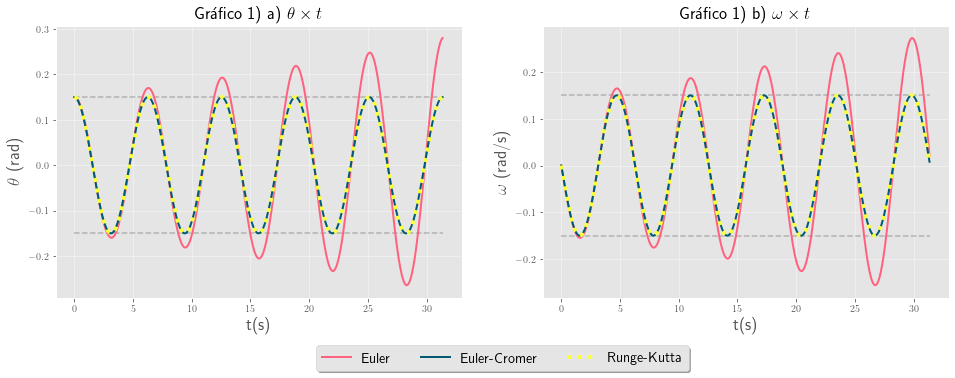

In [8]:
t=np.arange(0,31.42-0.04,0.04)
cm=1//2.54
fig=plt.figure(figsize=(16,5))
for i in [0,1]:
    plt.subplot(1,2,i+1)
    plt.plot(t,euler[i],linewidth=2,label="Euler",color='#ff627e')
    plt.plot(t,eulercrom[i],linewidth=2,label="Euler-Cromer",color='#005a74')
    plt.plot(t,rungektt[i],linewidth=4,label="Runge-Kutta",linestyle="dotted",color='#fbff41')
    if i==0: 
        plt.ylabel(r'$\theta$ (rad)',fontsize='xx-large')
        plt.title("Gráfico 1) a) "+r'$\theta \times t$ ',fontsize='xx-large')
    else:
        plt.ylabel(r'$\omega$ (rad/s)',fontsize='xx-large')
        plt.title("Gráfico 1) b) "+r'$\omega \times t$' ,fontsize='xx-large')
    plt.xlabel("t(s)",fontsize='xx-large')
    plt.hlines(np.max(rungektt[i]),xmin=0,xmax=31.42,linestyle="dashed",color='tab:gray',alpha=0.5)
    plt.hlines(-np.max(rungektt[i]),xmin=0,xmax=31.42,linestyle="dashed",color='tab:gray',alpha=0.5)
plt.legend(fontsize='x-large',loc='upper center', bbox_to_anchor=(-0.1, -.15),ncol=3,fancybox=True,shadow=True)
fig.savefig('grafico1ab.png', bbox_inches='tight', dpi=100)
plt.show()

Discussão ....

 Energia cinética , Portencial e total
 
  $$K=m\frac{\omega^2l^2}{2}$$ e $$U_{pot}=mgl(1-\cos\theta)$$ logo,$$E=K+U_{pot}=m\frac{\omega^2l^2}{2}+mg(1-\cos\theta)$$

In [9]:
g=9.8
l=9.8

K_eul=[(w**2*l**2)/2 for w in euler[1]]
K_eulcrom=[(w**2*l**2)/2 for w in eulercrom[1]]
K_rgktt=[(w**2*l**2)/2 for w in rungektt[1]]

U_eul=[g*l*(1-np.cos(t))for t in euler[0]]
U_eulcrom=[g*l*(1-np.cos(t)) for t in eulercrom[0]]
U_rgktt=[g*l*(1-np.cos(t)) for t in rungektt[0]]
t=np.arange(0,30,0.04)

E_eul=[k+u for k,u in zip(K_eul,U_eul)]
E_eulcrom=[k+u for k,u in zip(K_eulcrom,U_eulcrom)]
E_rgktt=[k+u for k,u in zip(K_rgktt,U_rgktt)]

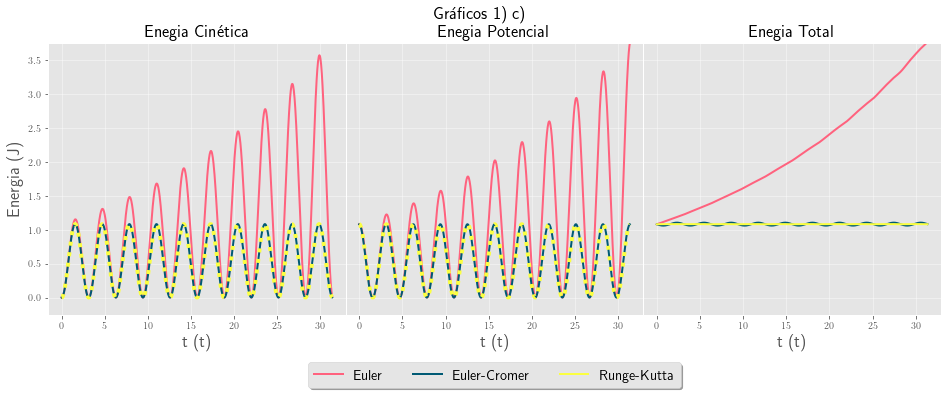

In [10]:
t=np.arange(0,31.42-0.04,0.04)
fig=plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
plt.suptitle("Gráficos 1) c)\n\n",fontsize='xx-large')
fig.subplots_adjust(wspace=0)
plt.plot(t,K_eul,linewidth=2,label="Euler",color='#ff627e')
plt.plot(t,K_eulcrom,linewidth=2,label="Euler-Cromer",color='#005a74')
plt.plot(t,K_rgktt,linewidth=4,label="Runge-Kutta",linestyle="dotted",color='#fbff41')
plt.xlabel('t (t)',fontsize='xx-large')
plt.ylim(-0.25,3.75)
plt.title('Enegia Cinética',fontsize='xx-large')
plt.ylabel('Energia (J)',fontsize='xx-large')
plt.subplot(1,3,2)
plt.plot(t,U_eul,linewidth=2,label="Euler",color='#ff627e')
plt.plot(t,U_eulcrom,linewidth=2,label="Euler-Cromer",color='#005a74')
plt.plot(t,U_rgktt,linewidth=4,label="Runge-Kutta",linestyle="dotted",color='#fbff41')
plt.ylim(-0.25,3.75)
plt.title('Enegia Potencial',fontsize='xx-large')
plt.xlabel('t (t)',fontsize='xx-large')
plt.tick_params(axis='y', colors='None')
plt.subplot(1,3,3)
plt.plot(t,E_eul,linewidth=2,label="Euler",color='#ff627e')
plt.plot(t,E_eulcrom,linewidth=2,label="Euler-Cromer",color='#005a74')
plt.plot(t,E_rgktt,linewidth=2,label="Runge-Kutta",color='#fbff41')
plt.ylim(-0.25,3.75)
plt.tick_params(axis='y', colors='None')
plt.title('Enegia Total',fontsize='xx-large')
plt.xlabel('t (t)',fontsize='xx-large')
plt.legend(fontsize='x-large',loc='upper center', bbox_to_anchor=(-0.5, -0.15),ncol=3,fancybox=True,shadow=True)
fig.savefig('energias.png', bbox_inches='tight', dpi=100)
plt.show()

Discussão.....

## Questão 2) Pêndulo não linear, amortercido e forçado

In [5]:
def omega2(dt,thetai,omegai, g, l,q,a,W,ti):
    return omegai-(g/l)*np.sin(thetai)*dt-q*omegai*dt+a*np.sin(W*ti)*dt

def edo2eulcrom(fi,dfi, params_df,f0,df0,t0,dt,N):
    """
    Função para encontrar a solução numérica para uma EDO de 2 grau pelo método de Euler-Cromer
    Retorna: um par de listas com as soluções de f e df
    """
    f=np.zeros(int(N))
    df=np.zeros(int(N))
    
    df[0]=dfi(t0,f0,df0,*params_df,t0)
    f[0]=fi(t0,f0,df[0])

    for i in range(1,int(N)):
        
        df[i]=dfi(dt,f[i-1],df[i-1],*params_df,t0+i*dt)
        f[i]=fi(dt,f[i-1],df[i])
        if fi(dt,f[i-1],df[i])>(np.pi):
            f[i]-=2*np.pi
        if fi(dt,f[i-1],df[i])<-(np.pi):
            f[i]+=2*np.pi
        
            
    return (f,df)

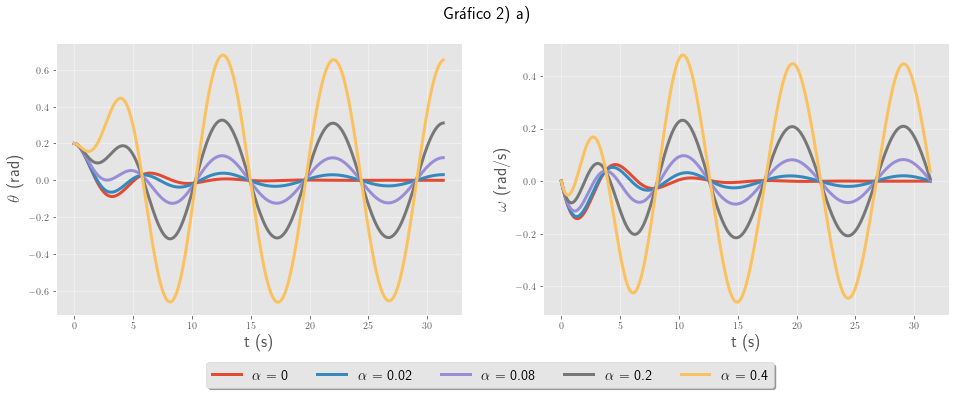

In [12]:
t=np.arange(0,31.42-0.04,0.04)
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,5))
for a in [0,.02,.08,.2,.4]:
    eulercrom2 = edo2eulcrom(theta,omega2,[9.8,9.8, 0.5 , a ,2/3],0.2,0,0,0.04,31.42/0.04)
                                         #[g  , l , q , a , W ]
    
    ax1.plot(t,eulercrom2[0],linewidth=3)
    ax2.plot(t,eulercrom2[1],linewidth=3,label=r"$\alpha$ = "+str(a))
ax1.set_ylabel(r"$\theta$ (rad)",fontsize='xx-large')
ax2.set_ylabel(r"$\omega$ (rad/s)",fontsize='xx-large')
ax1.set_xlabel(r"t (s)",fontsize='xx-large')
ax2.set_xlabel(r"t (s)",fontsize='xx-large')
plt.suptitle("Gráfico 2) a)",fontsize='xx-large')
#plt.plot(t,eulercrom2[1],label="omega")
plt.legend(fontsize='x-large',loc='upper center', bbox_to_anchor=(-0.13, -0.15),ncol=5,fancybox=True,shadow=True)
fig.savefig('grafico2a.png', bbox_inches='tight', dpi=100)
plt.show()

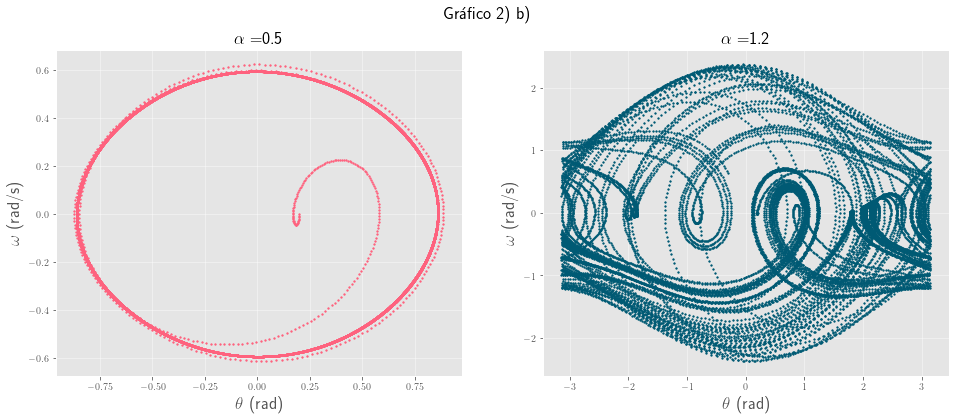

In [7]:
fig=plt.figure(figsize=(16,6))
for a,i,c in zip([0.5,1.2],[1,2],['#ff627e','#005a74']):
    plt.subplot(1,2,i)
    eulercrom2 = edo2eulcrom(theta,omega2,[9.8,9.8, 0.5 , a ,2/3],0.2,0,0,0.04,20*31.42/0.04)
    plt.scatter(eulercrom2[0],eulercrom2[1],s=3,c=c)
    plt.xlabel(r"$\theta$ (rad)",fontsize='xx-large')
    plt.ylabel(r"$\omega$ (rad/s)",fontsize='xx-large')
    plt.title(r"$\alpha = $"+str(a),fontsize='xx-large')
plt.suptitle("Gráfico 2) b)",fontsize='xx-large')
fig.savefig('grafico2b.png', bbox_inches='tight', dpi=100)
plt.show()

In [147]:
def edo2eulcromPC(fi,dfi, params_df,f0,df0,t0,dt,N):
    """
    Função para encontrar a solução numérica para uma EDO de 2 grau pelo método de Euler-Cromer
    Retorna: um par de listas com as soluções de f e df
    """
    f=np.zeros(int(N))
    df=np.zeros(int(N))
    
    df[0]=dfi(t0,f0,df0,*params_df,t0)
    f[0]=fi(t0,f0,df[0])
    fpc=[]
    dfpc=[]
    for i in range(1,int(N)):
        
        df[i]=dfi(dt,f[i-1],df[i-1],*params_df,t0+i*dt)
        f[i]=fi(dt,f[i-1],df[i])
        if fi(dt,f[i-1],df[i])>(np.pi):
            f[i]-=2*np.pi
        if fi(dt,f[i-1],df[i])<-(np.pi):
            f[i]+=2*np.pi
        t=t0+i*dt
        if(t>300):
            for n in range(1,2000):
                if abs(t-2*n*np.pi/params_df[-1])<dt/2:
                    fpc.append(f[i])
                    dfpc.append(df[i])
            
    return (f,df,np.array(fpc),np.array(dfpc))

In [148]:
eulercrom2pc_05 = edo2eulcromPC(theta,omega2,[9.8,9.8, 0.5 , 0.5 ,2/3],0.2,0,0,0.04,400*31.42/0.04)
eulercrom2pc_12 = edo2eulcromPC(theta,omega2,[9.8,9.8, 0.5 , 1.2 ,2/3],0.2,0,0,0.04,400*31.42/0.04)

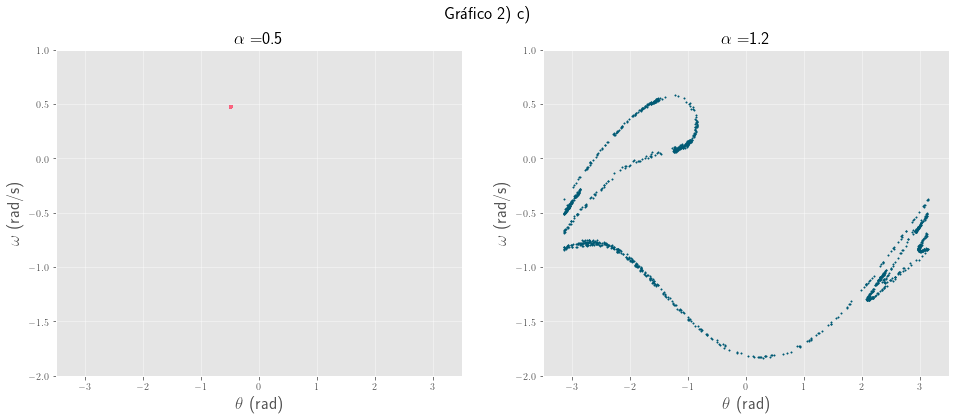

In [158]:
fig=plt.figure(figsize=(16,6))
for a,array,i,c in zip([0.5,1.2],[eulercrom2pc_05,eulercrom2pc_12],[1,2],['#ff627e','#005a74']):
    plt.subplot(1,2,i)
    plt.scatter(array[2],array[3],s=2,c=c)
    plt.xlabel(r"$\theta$ (rad)",fontsize='xx-large')
    plt.ylabel(r"$\omega$ (rad/s)",fontsize='xx-large')
    plt.title(r"$\alpha = $"+str(a),fontsize='xx-large')
    plt.xlim(-3.5,3.5)
    plt.ylim(-2,1)
plt.suptitle("Gráfico 2) c)",fontsize='xx-large')
fig.savefig('poincare.png', bbox_inches='tight', dpi=100)
plt.show()

In [166]:
eulercrom2pc_16 = edo2eulcromPC(theta,omega2,[9.8,9.8, 0.5 , 1.6 ,2/3],0.2,0,0,0.04,400*31.42/0.04)
eulercrom2pc_20 = edo2eulcromPC(theta,omega2,[9.8,9.8, 0.5 , 2.0 ,2/3],0.2,0,0,0.04,400*31.42/0.04)

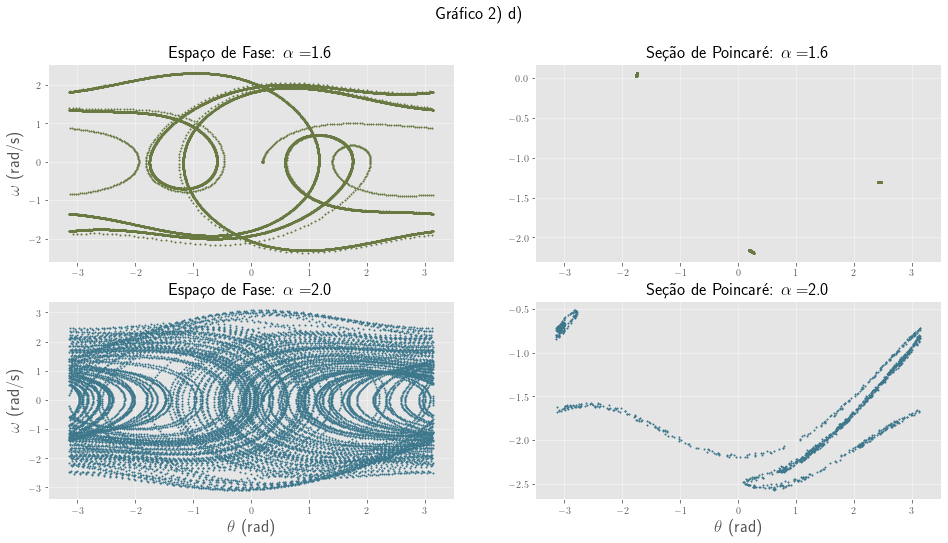

In [206]:
fig=plt.figure(figsize=(16,8))
for a,array,i,c in zip([1.6,2.0],[eulercrom2pc_16,eulercrom2pc_20],[2,4],['#687941','#3c778c']):
    plt.subplot(2,2,i-1)
    plt.scatter(array[0][:15710],array[1][:15710],s=2,c=c)
    if i-1==3:plt.xlabel(r"$\theta$ (rad)",fontsize='xx-large')
    plt.ylabel(r"$\omega$ (rad/s)",fontsize='xx-large')
    plt.title(r"Espaço de Fase: $\alpha = $"+str(a),fontsize='xx-large')
    plt.xlim(-3.5,3.5)
    plt.subplot(2,2,i)
    plt.scatter(array[2],array[3],s=2,c=c)
    if i==4:plt.xlabel(r"$\theta$ (rad)",fontsize='xx-large')
    #plt.ylabel(r"$\omega$ (rad/s)",fontsize='xx-large')
    plt.title(r"Seção de Poincaré: $\alpha = $"+str(a),fontsize='xx-large')
    plt.xlim(-3.5,3.5)
    #plt.ylim(-3,1)
plt.suptitle("Gráfico 2) d)",fontsize='xx-large')
fig.savefig('poincare2.png', bbox_inches='tight', dpi=100)
plt.show()

## Questão 3) Movimento hamônico simples

$$\frac{d^2x}{dt^2}=-kx^\alpha$$

$$\dot{x}_{i+\Delta t}=\dot{x}_{i}-kx_i^\alpha\Delta t$$


$$x_{i+\Delta t}=x_i+\dot{x}_{i+\Delta t}\Delta t$$

In [5]:
def omegax(dt,xi,omegaxi, k, alpha):
    return omegaxi-k*np.power(xi,alpha)*dt
eulercromx = edo2eulcrom(theta,omegax,[1,1],1,0,0,0.04,31.42/0.04)

6.28
6.28
6.279999999999999
6.280000000000001
6.280000000000001
6.279999999999998
6.280000000000001
6.280000000000001
6.280000000000001
6.28
6.28
6.279999999999999
6.280000000000001
6.280000000000001
6.279999999999998
6.280000000000001
6.280000000000001
6.280000000000001
6.28
6.28
6.279999999999999
6.280000000000001
6.280000000000001
6.279999999999998
6.280000000000001
6.280000000000001
6.280000000000001
6.28
6.28
6.279999999999999
6.280000000000001
6.280000000000001
6.279999999999998
6.280000000000001
6.280000000000001
6.280000000000001
6.28
6.28
6.279999999999999
6.280000000000001
6.280000000000001
6.279999999999998
6.280000000000001
6.280000000000001
6.280000000000001


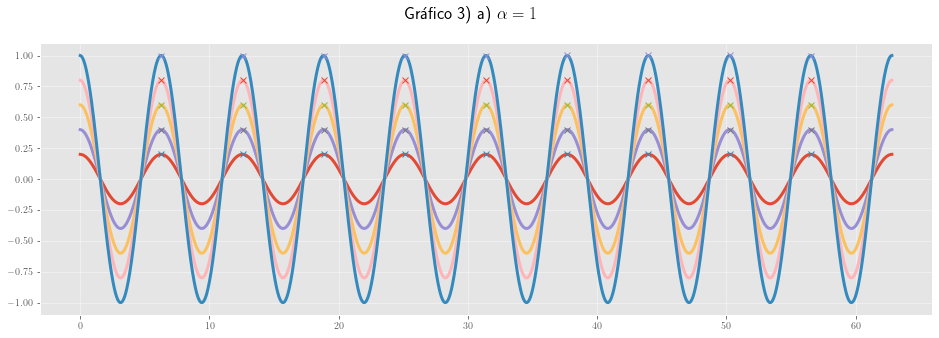

In [36]:
t=np.arange(0,2*31.42,0.04)
fig=plt.figure(figsize=(16,5))
for x0 in [.2,.4,.6,.8,1]:
    eulercromx = edo2eulcrom(theta,omegax,[1,1],x0,0,0,0.04,2*31.42/0.04)
    peaks, _ = find_peaks(eulercromx[0], height=0)
    #print(t[peaks])
    plt.plot(t,eulercromx[0],linewidth=3)
    plt.plot(t[peaks],eulercromx[0][peaks],"x")
    t0=0
    for t1 in t[peaks]:
        print(t1-t0)
        t0=t1
plt.suptitle("Gráfico 3) a) "+r'$\alpha =1$' ,fontsize='xx-large')
#fig.savefig('grafico3a.png', bbox_inches='tight', dpi=100)
plt.show()


37.08
18.52
18.56
18.520000000000003
12.32
12.36
12.36
12.36
12.36
9.24
9.28
9.280000000000001
9.239999999999998
9.280000000000001
9.280000000000001
7.4
7.4
7.440000000000001
7.399999999999999
7.399999999999999
7.440000000000005
7.399999999999999
7.399999999999999


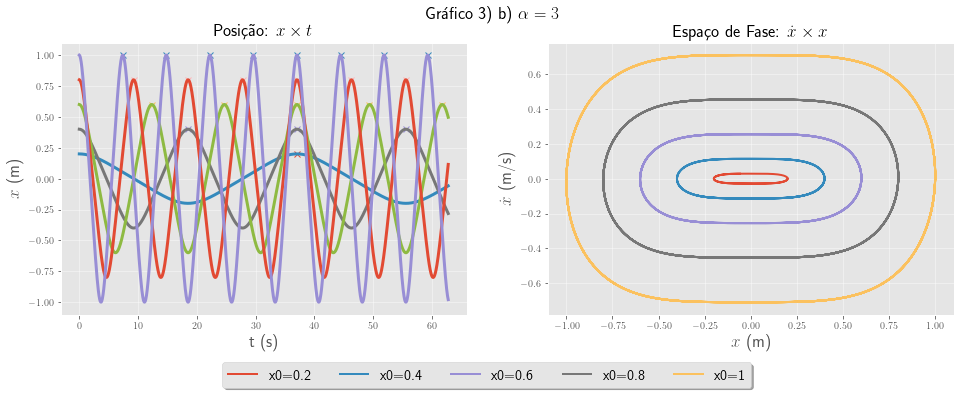

In [30]:
t=np.arange(0,2*31.42,0.04)
fig, (ax1,ax3) = plt.subplots(1, 2,figsize=(16,5))
colors=['#0e2038', '#3a335a', '#64477f', '#8f5ca6', '#9f7dd7']
#colors.reverse()
for x0 in [.2,.4,.6,.8,1]:
    eulercromx = edo2eulcrom(theta,omegax,[1,3],x0,0,0,0.04,2*31.42/0.04)
    peaks, _ = find_peaks(eulercromx[0], height=0)
    #print(t[peaks])
    ax1.plot(t[peaks],eulercromx[0][peaks],"x")
    t0=0
    for t1 in t[peaks]:
        print(t1-t0)
        t0=t1
    
    ax1.plot(t,eulercromx[0],linewidth=3)
    ax3.plot(eulercromx[0],eulercromx[1],linewidth=2,label="x0="+str(x0))

ax1.set_ylabel(r"$x$ (m)",fontsize='xx-large')
ax1.set_title("Posição: "+r"$ x \times t$",fontsize='xx-large')
ax1.set_xlabel(r"t (s)",fontsize='xx-large')
ax3.set_xlabel(r"$x$ (m)",fontsize='xx-large')
ax3.set_title("Espaço de Fase: " +r"$\dot{x} \times x$",fontsize='xx-large')
ax3.set_ylabel(r"$\dot{x}$ (m/s)",fontsize='xx-large')
plt.legend(fontsize='x-large',loc='upper center', bbox_to_anchor=(-0.15, -0.15),ncol=5,fancybox=True,shadow=True)
plt.suptitle("Gráfico 3) b) "+r'$\alpha =3$' ,fontsize='xx-large')
#fig.savefig('grafico3b.png', bbox_inches='tight', dpi=100)
plt.show()

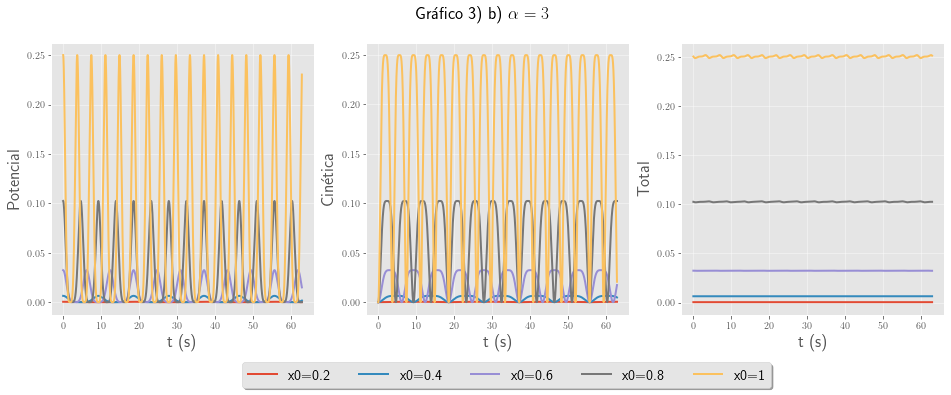

In [52]:
t=np.arange(0,2*31.42,0.01)
fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(16,5))
for x0 in [.2,.4,.6,.8,1]:
    eulercromx = edo2eulcrom(theta,omegax,[1,3],x0,0,0,0.01,2*31.42/0.01)
    
    ax1.plot(t,.25*eulercromx[0]**4,linewidth=2)
    ax2.plot(t,.5*eulercromx[1]**2,linewidth=2)
    ax3.plot(t,.25*eulercromx[0]**4+.5*eulercromx[1]**2,linewidth=2,label="x0="+str(x0))

ax1.set_ylabel("Potencial",fontsize='xx-large')
ax2.set_ylabel("Cinética",fontsize='xx-large')
ax1.set_xlabel("t (s)",fontsize='xx-large')
ax2.set_xlabel("t (s)",fontsize='xx-large')
ax3.set_xlabel("t (s)",fontsize='xx-large')
ax3.set_ylabel("Total",fontsize='xx-large')
plt.legend(fontsize='x-large',loc='upper center', bbox_to_anchor=(-0.666, -0.15),ncol=5,fancybox=True,shadow=True)
plt.suptitle("Gráfico 3) b) "+r'$\alpha =3$' ,fontsize='xx-large')
fig.savefig('grafico3b2.png', bbox_inches='tight', dpi=100)
plt.show()

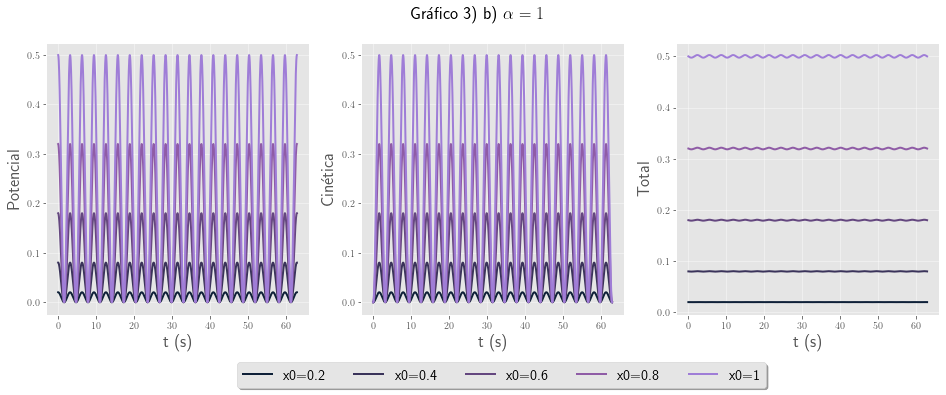

In [53]:
t=np.arange(0,2*31.42,0.01)
fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(16,5))
for x0,c in zip([.2,.4,.6,.8,1],['#0e2038', '#3a335a', '#64477f', '#8f5ca6', '#9f7dd7']):
    eulercromx = edo2eulcrom(theta,omegax,[1,1],x0,0,0,0.01,2*31.42/0.01)
    
    ax1.plot(t,.5*eulercromx[0]**2,linewidth=2,color=c)
    ax2.plot(t,.5*eulercromx[1]**2,linewidth=2,color=c)
    ax3.plot(t,.5*eulercromx[0]**2+.5*eulercromx[1]**2,linewidth=2,label="x0="+str(x0),color=c)

ax1.set_ylabel("Potencial",fontsize='xx-large')
ax2.set_ylabel("Cinética",fontsize='xx-large')
ax1.set_xlabel("t (s)",fontsize='xx-large')
ax2.set_xlabel("t (s)",fontsize='xx-large')
ax3.set_xlabel("t (s)",fontsize='xx-large')
ax3.set_ylabel("Total",fontsize='xx-large')
plt.legend(fontsize='x-large',loc='upper center', bbox_to_anchor=(-0.666, -0.15),ncol=5,fancybox=True,shadow=True)
plt.suptitle("Gráfico 3) b) "+r'$\alpha =1$' ,fontsize='xx-large')
fig.savefig('grafico3b3.png', bbox_inches='tight', dpi=100)
plt.show()

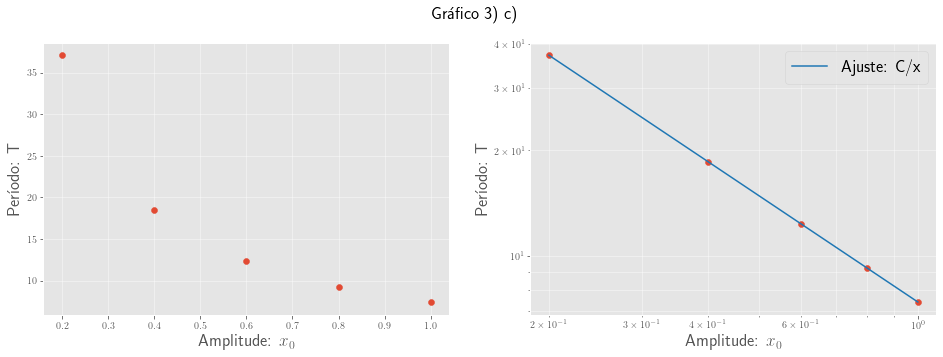

[7.41453786] [[0.00215194]]


In [25]:
per3=[37.08,18.52,12.36,9.28,7.4]
#enr3=[.25*x0**4 for x0 in [.2,.4,.6,.8,1]]
x0=[.2,.4,.6,.8,1]
def ax(x,a): return a*np.power(x,-1)
popt,pcov =curve_fit(ax,x0,per3)
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,5))
ax2.plot(x0,ax(x0,*popt),color="tab:blue",label="Ajuste: C/x")
ax1.scatter(x0,per3)
ax2.scatter(x0,per3)

#plt.plot(enr3,ax(enr3,*popt))
ax2.set_yscale('log')
ax2.set_xscale('log')
ax1.set_xlabel(r"Amplitude: $x_0$",fontsize='xx-large')
ax2.set_xlabel(r"Amplitude: $x_0$",fontsize='xx-large')
ax1.set_ylabel("Período: T",fontsize='xx-large')
ax2.set_ylabel("Período: T",fontsize='xx-large')
plt.grid(True, which="both", ls="-")
plt.legend(fontsize='xx-large')
plt.suptitle("Gráfico 3) c)",fontsize='xx-large')
fig.savefig('grafico3bc.png', bbox_inches='tight', dpi=100)
plt.show()
print(popt,np.sqrt(pcov))

In [207]:
!jupyter nbconvert --to pdf --no-input Lista1PedroZilves.ipynb

[NbConvertApp] Converting notebook Lista1PedroZilves.ipynb to pdf
[NbConvertApp] Support files will be in Lista1PedroZilves_files/
[NbConvertApp] Making directory ./Lista1PedroZilves_files
[NbConvertApp] Making directory ./Lista1PedroZilves_files
[NbConvertApp] Making directory ./Lista1PedroZilves_files
[NbConvertApp] Making directory ./Lista1PedroZilves_files
[NbConvertApp] Making directory ./Lista1PedroZilves_files
[NbConvertApp] Making directory ./Lista1PedroZilves_files
[NbConvertApp] Writing 23688 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', './notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', './notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 539605 bytes to Lista1PedroZilves.pdf
